In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix,classification_report
import glob
import seaborn as sns
import keras
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import LabelEncoder

Processing model: all_vs_all_z_norm_unbalanced_100e
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Classification Report for all_vs_all_z_norm_unbalanced_100e:
               precision    recall  f1-score   support

        0-40      0.824     0.852     0.838      2336
       40-65      0.770     0.785     0.777      2056
       65-85      0.589     0.236     0.337       267
      85-100      0.732     0.825     0.776       342

    accuracy                          0.790      5001
   macro avg      0.729     0.674     0.682      5001
weighted avg      0.783     0.790     0.782      5001

Processing model: all_vs_all_z_norm_balanced_100e
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Classification Report for all_vs_all_z_norm_balanced_100e:
               precision    recall  f1-score   support

        0-40      0.805     0.861     0.832      2336
       40-65      0.812     0.693     0.748      2056
       65-85      0.466     0.566     0.511       267
      85-100      0.701     0.871     0.77

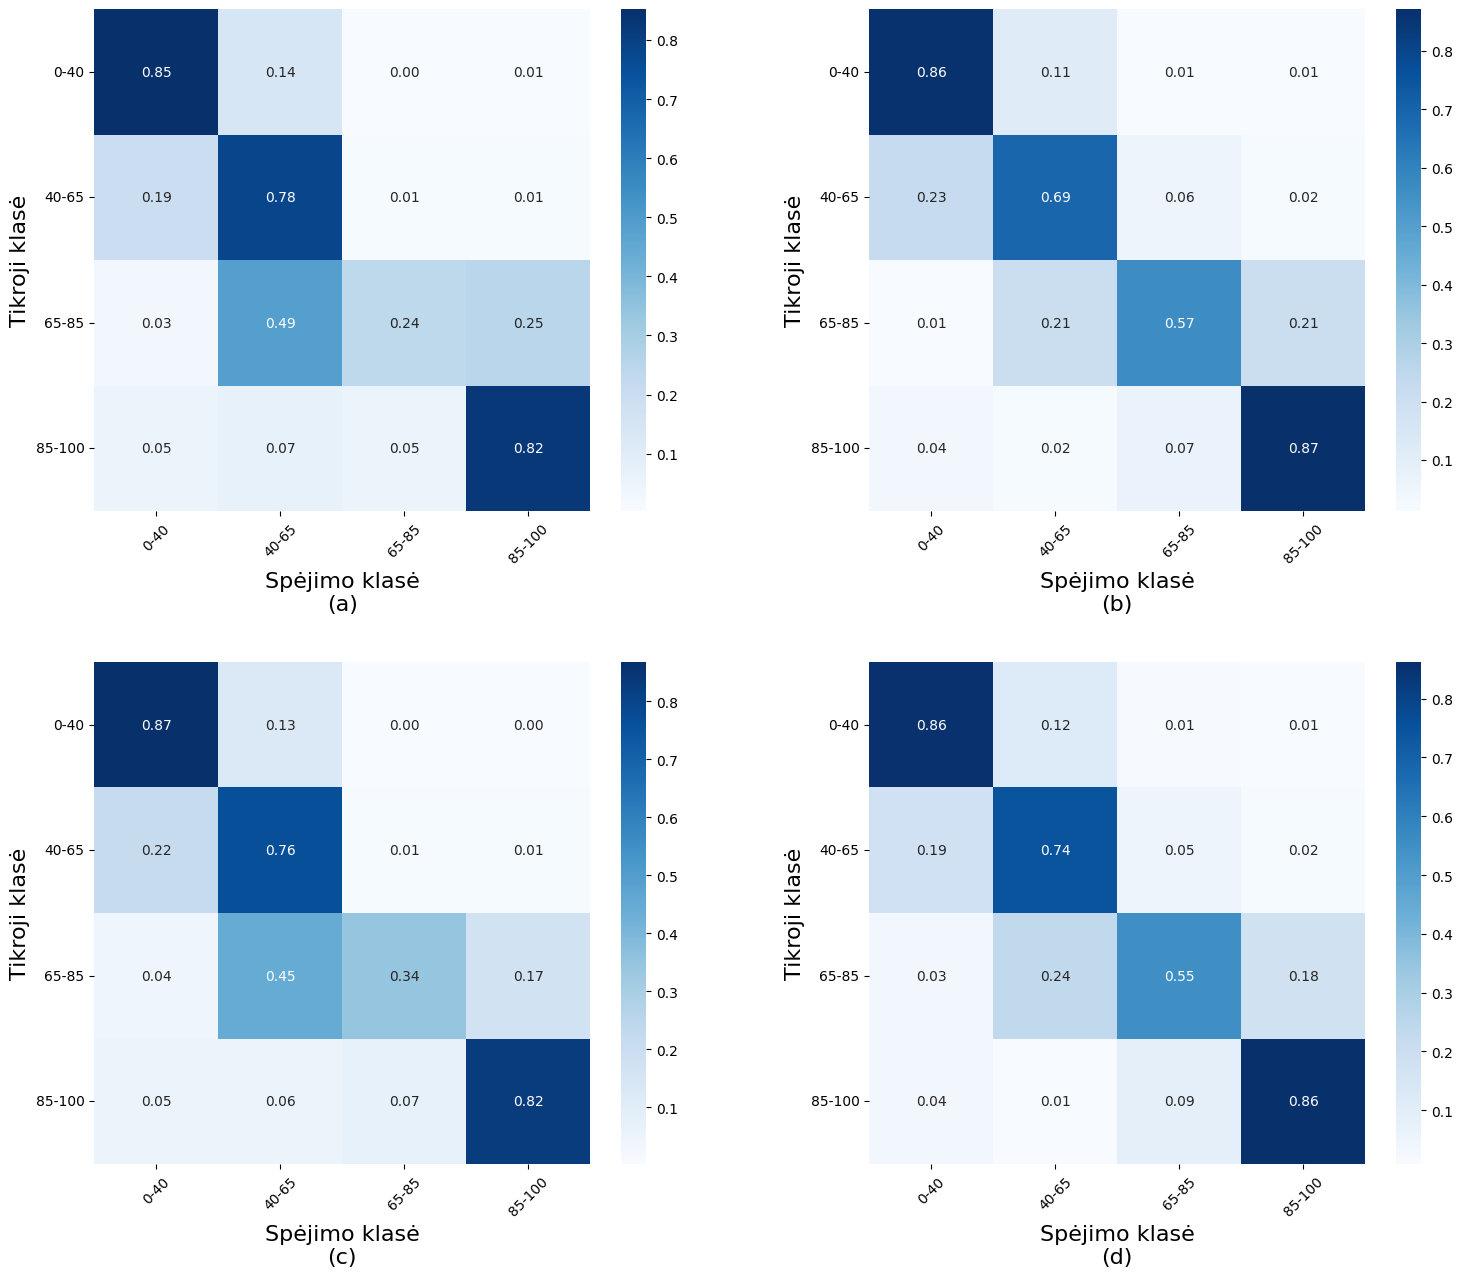

In [ ]:
def load_test_data(model_name):
    loaded_data = np.load(f'./test_data/{model_name}.npz', allow_pickle=True)
    x_test_loaded = loaded_data['x_test']
    y_test_loaded = loaded_data['y_test']
    return x_test_loaded, y_test_loaded

def plot_final_CM():
    model_names = ['all_vs_all_z_norm_unbalanced_100e', 'all_vs_all_z_norm_balanced_100e', 'best_model_z_norm_unbalanced_100e', 'best_model_z_norm_balanced_100e']
    all_cms = []
    titles = ['(a)', '(b)', '(c)', '(d)']

    for model_name in model_names:
        x_test, y_test = load_test_data(model_name)
        model = keras.models.load_model(f"./models/{model_name}.keras")

        encoder = LabelEncoder()
        encoder.fit(y_test)
        klases = [klase for klase in encoder.classes_]

        y_predicted = encoder.inverse_transform(np.argmax(model.predict(x_test), axis=1))
        cm = confusion_matrix(y_test, y_predicted, labels=encoder.classes_, normalize='true')
        all_cms.append((cm, klases))

        report = classification_report(y_test, y_predicted, output_dict=False, digits=3)
        print(f"Classification Report for {model_name}:\n", report)

    fig, axes = plt.subplots(2, 2, figsize=(18, 15))  # 12 10
    plt.subplots_adjust(wspace=0.25, hspace=0.3) 

    for ax, (cm, klases), title in zip(axes.flatten(), all_cms, titles):
        sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=klases, yticklabels=klases, ax=ax)
        ax.set_xlabel(f'Spėjimo klasė\n{title}', fontsize=16) 
        ax.set_ylabel('Tikroji klasė', fontsize=16)
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)

    plt.show()

plot_final_CM()

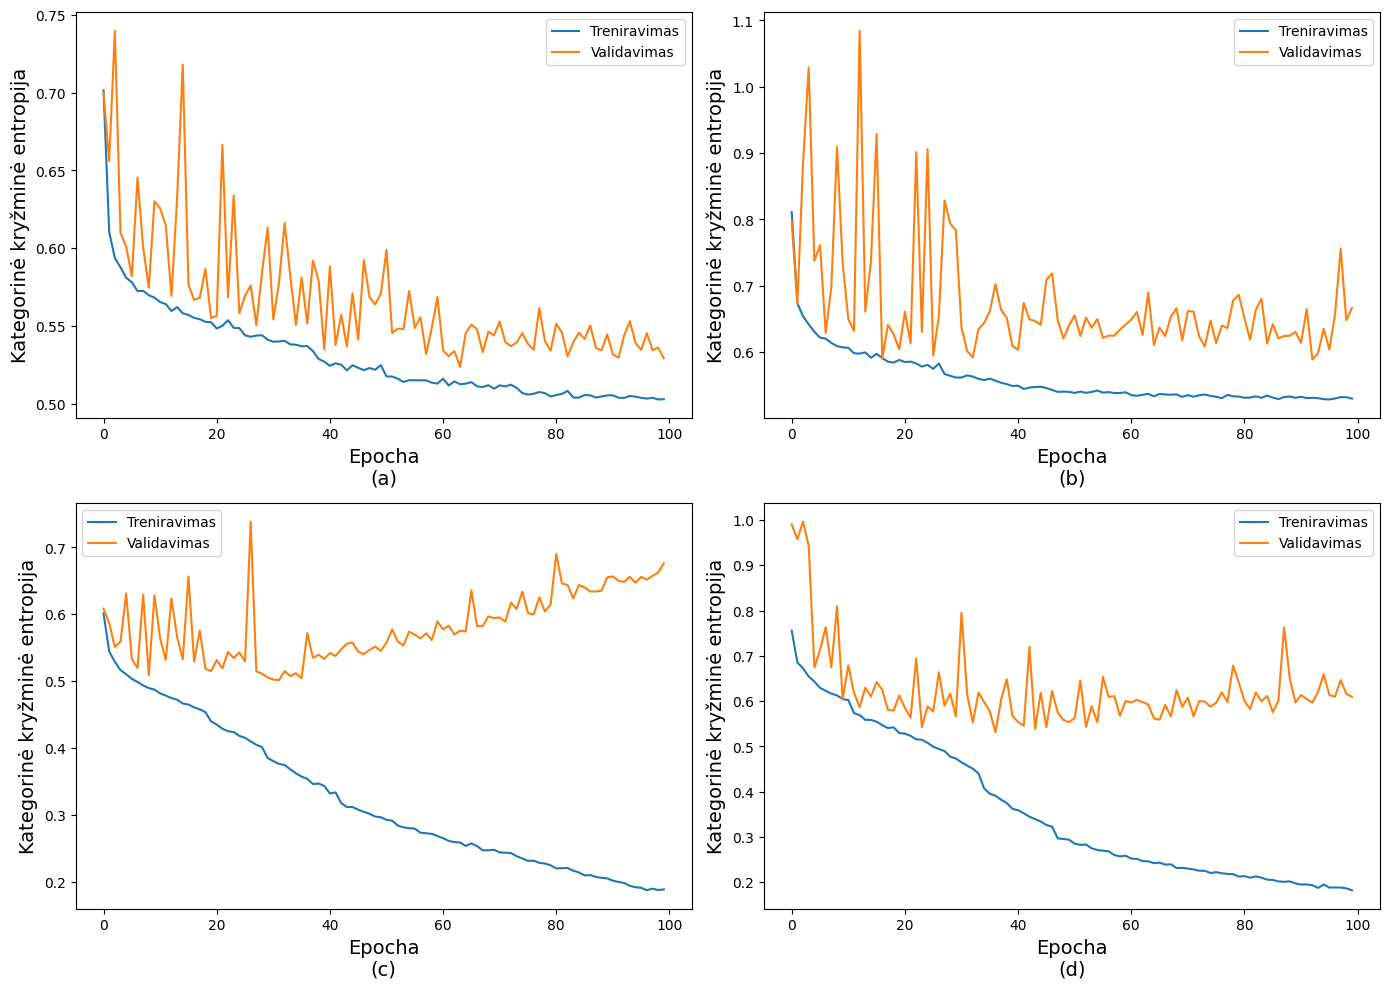

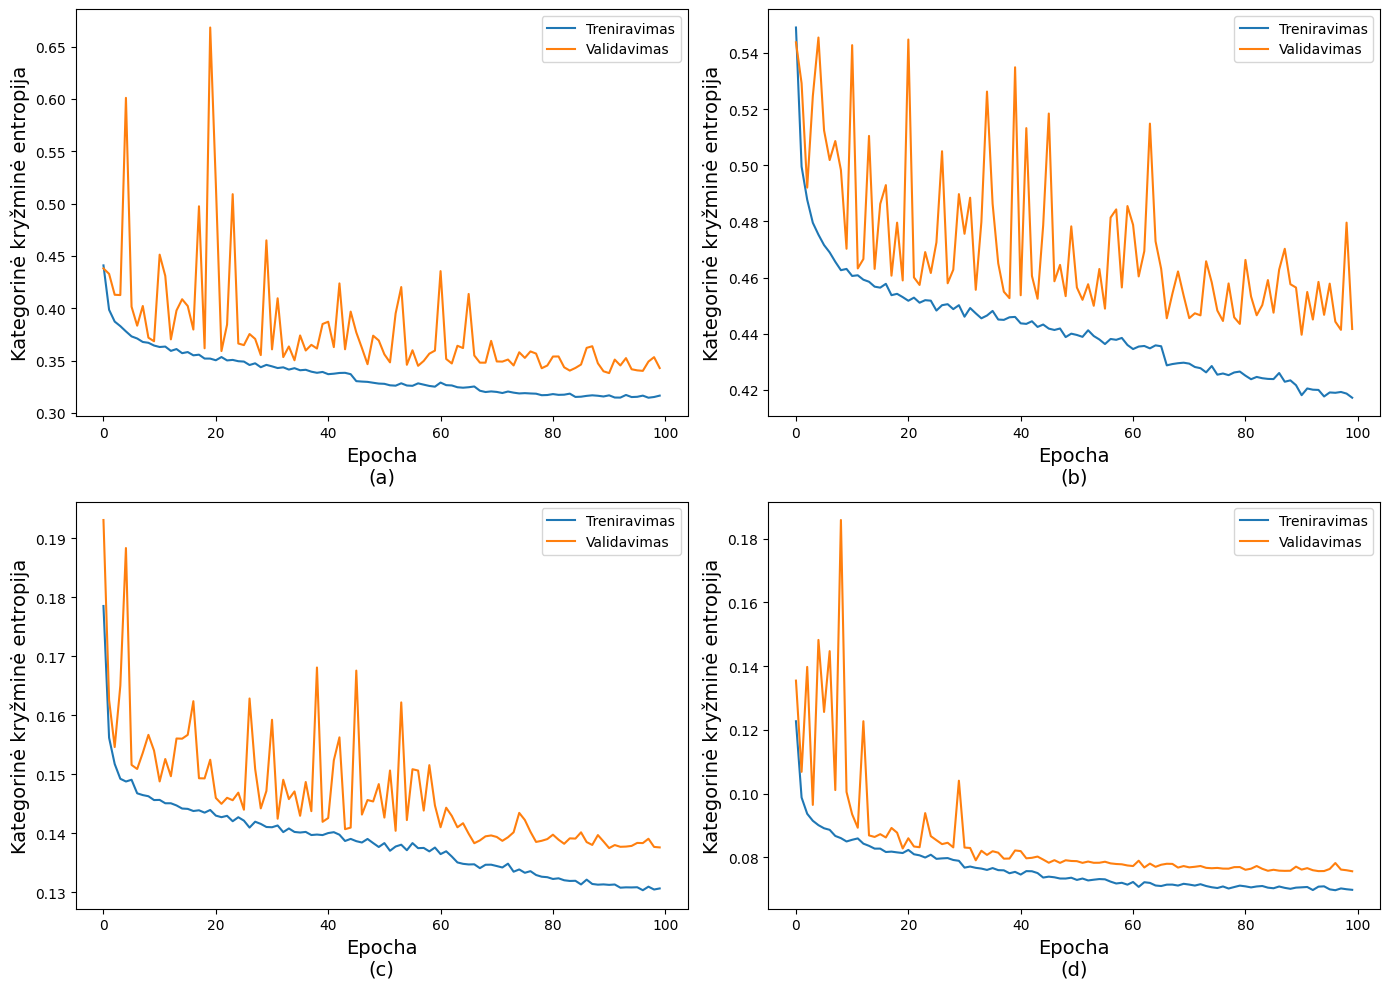

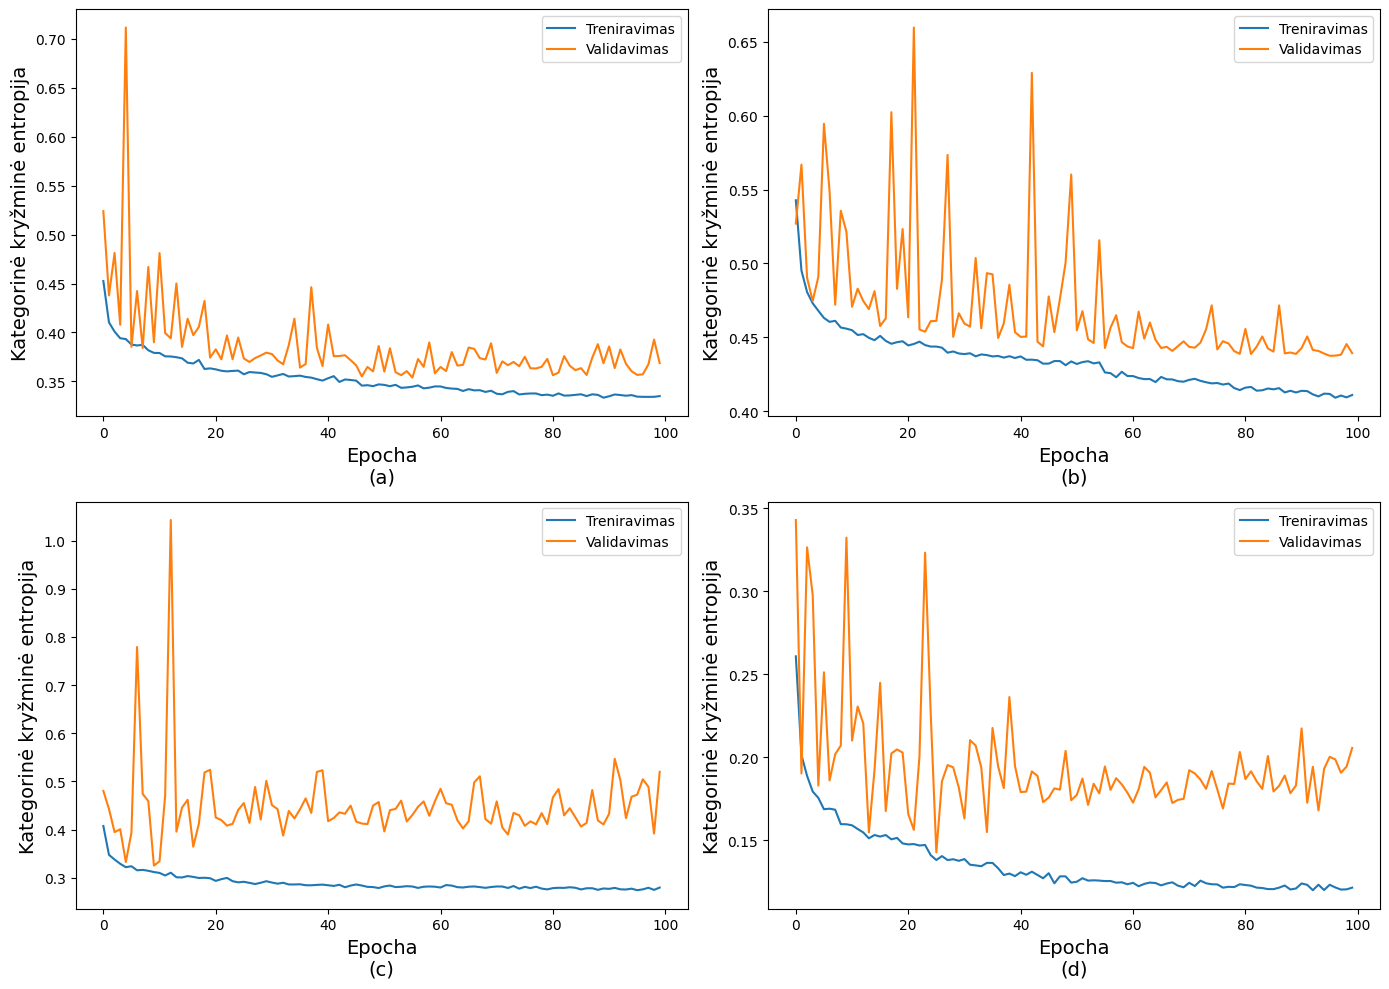

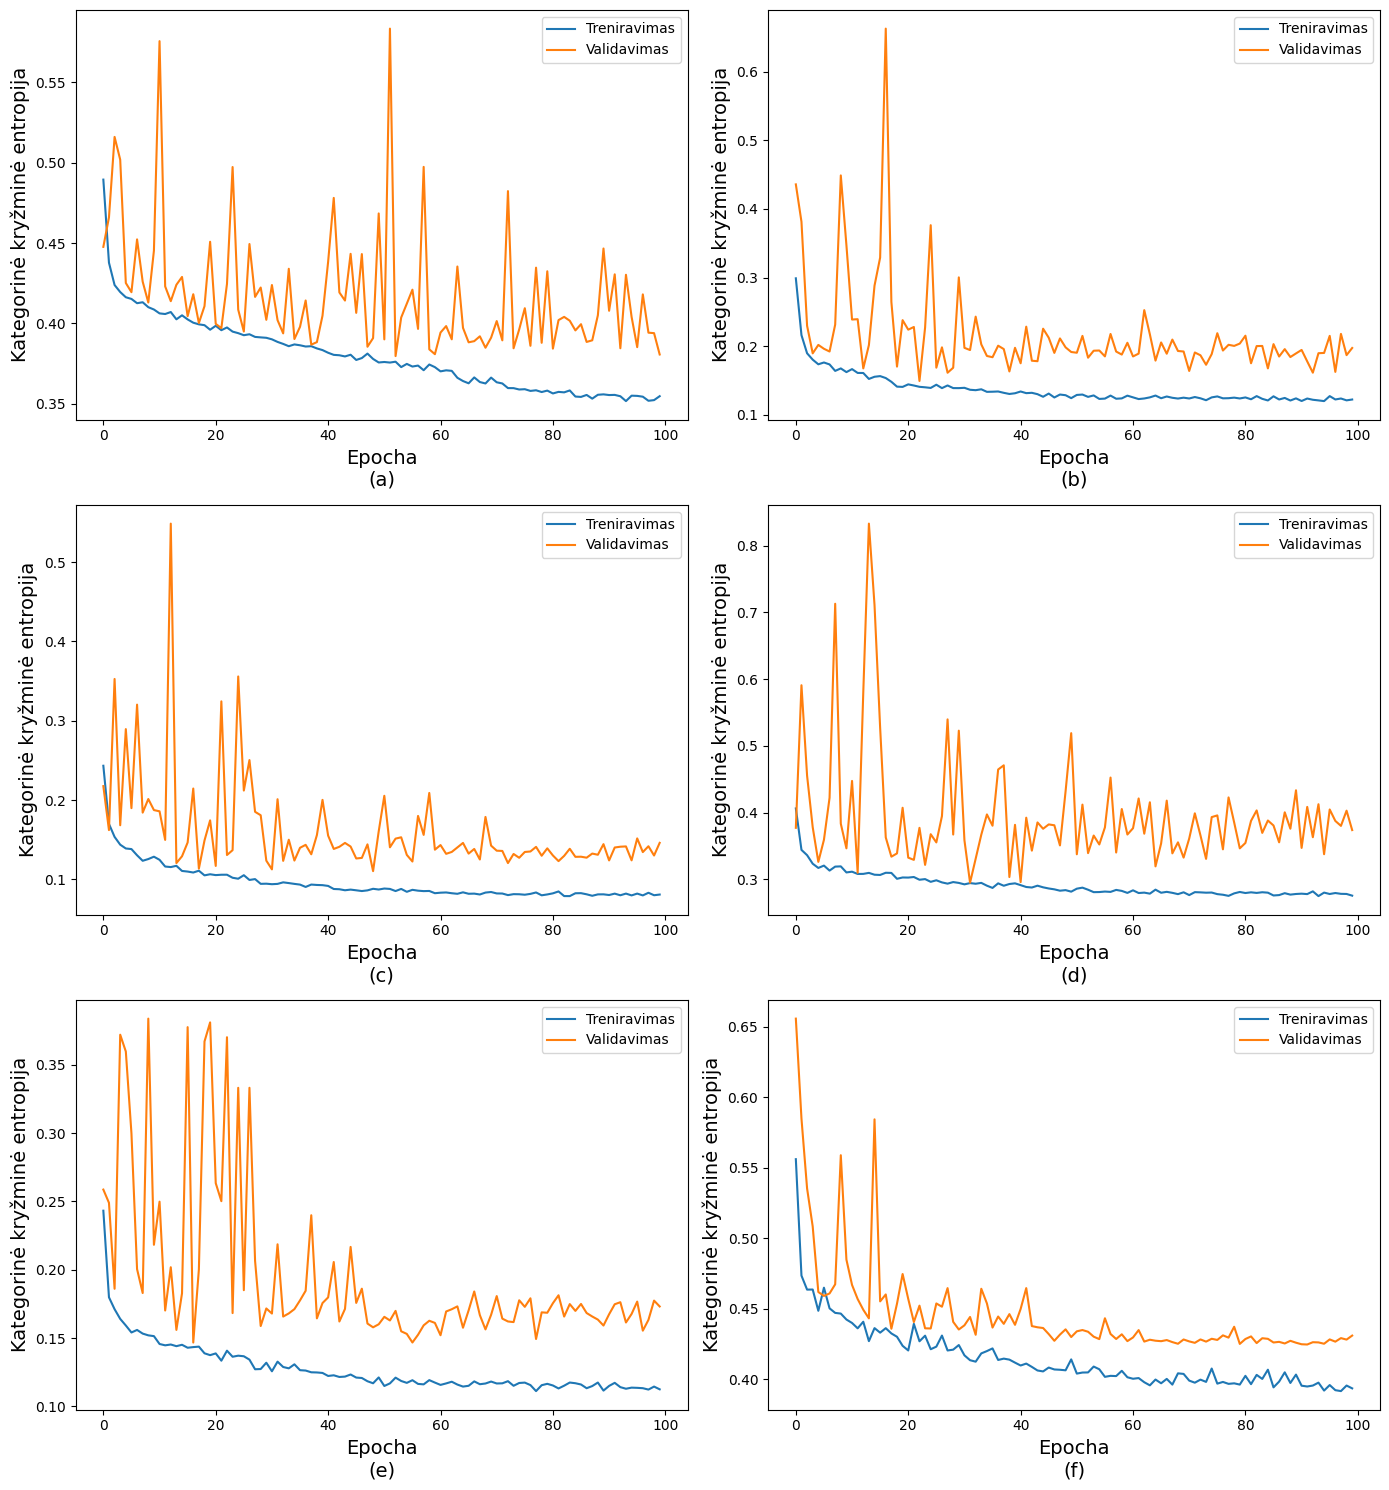

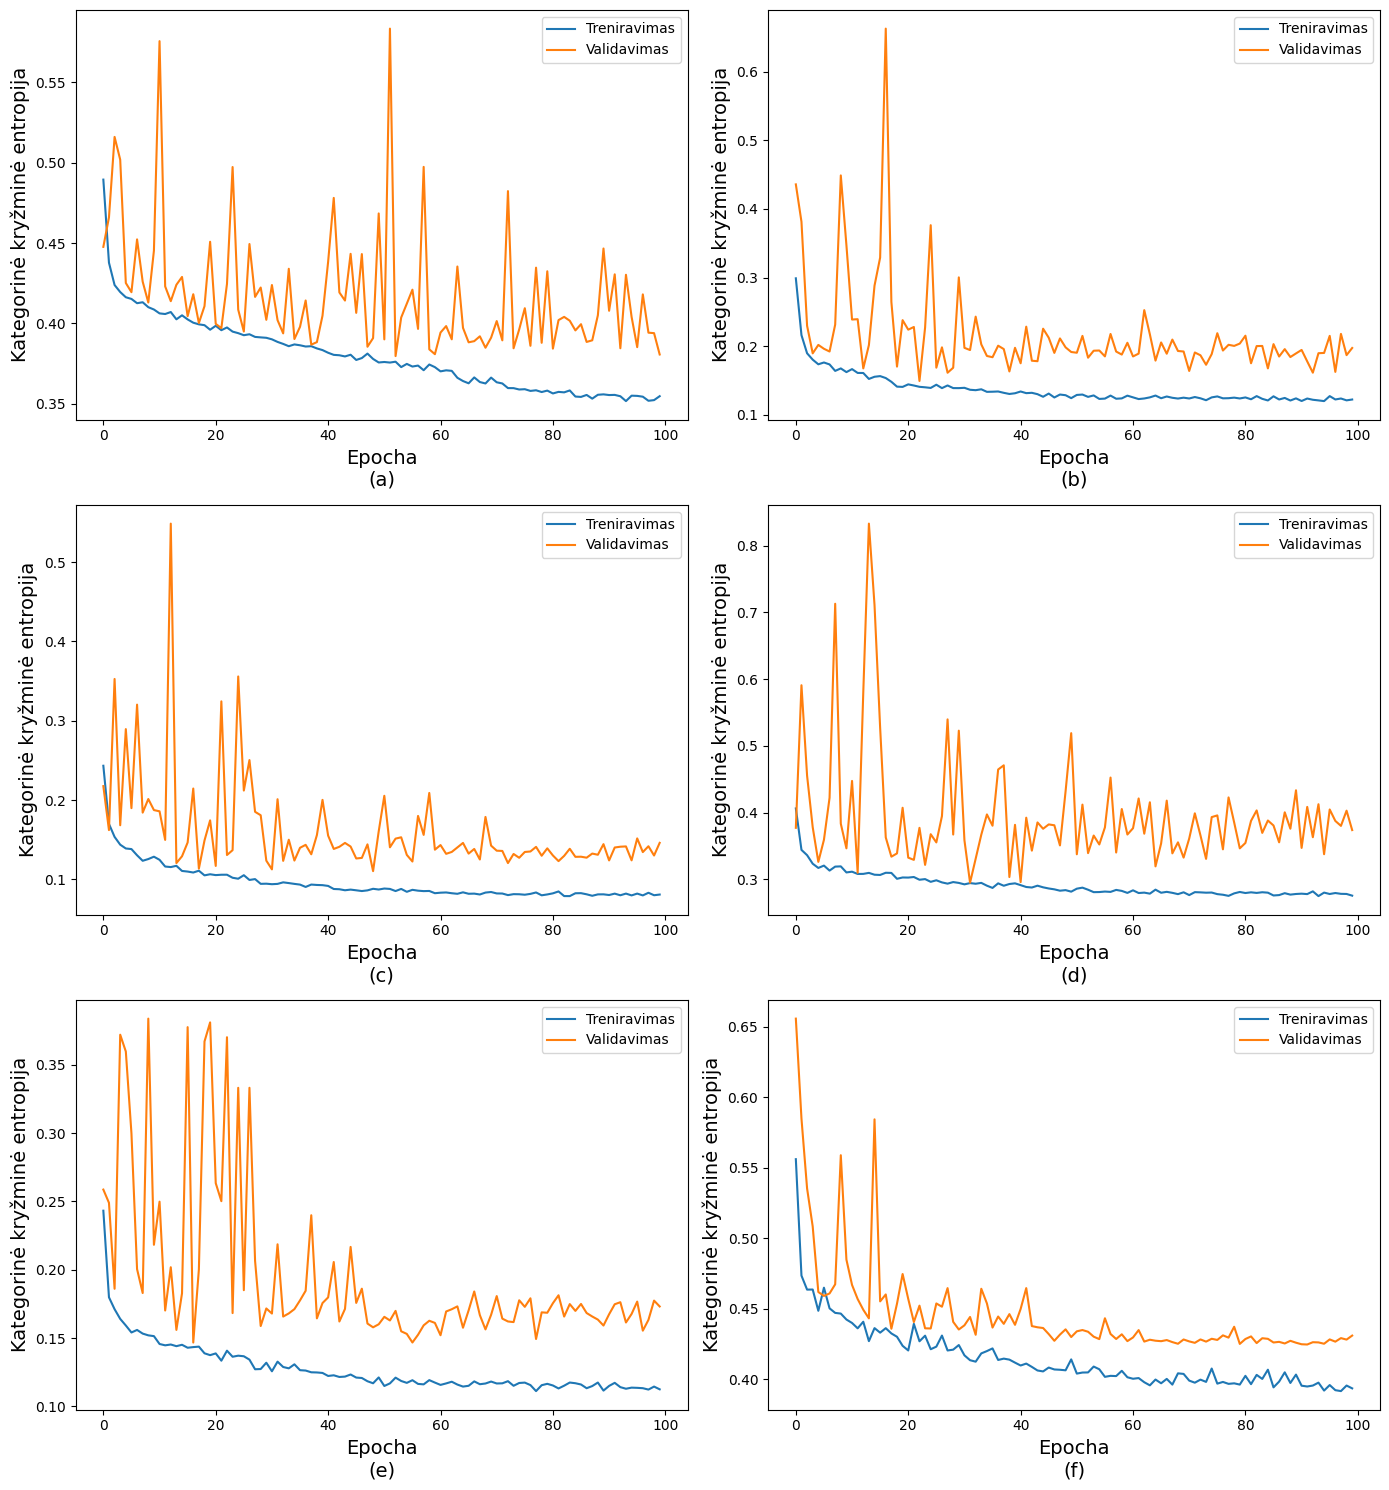

In [ ]:
def plot_training_loss(model_names):
    training_dir = './oVo' if 'VS' in model_names[0] else'.'
    num_models = len(model_names)
    rows = (num_models + 1) // 2 

    fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows), sharex=False, sharey=False) 
    axes = axes.flatten() if num_models > 1 else [axes]
    letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

    for i, model_name in enumerate(model_names):
        training_path = f"{training_dir}/training_csv/{model_name}_training.csv"
        
        df = pd.read_csv(training_path)


        ax = axes[i]

        ax.plot(df['epoch'], df['loss'], label='Treniravimas')
        ax.plot(df['epoch'], df['val_loss'], label='Validavimas')

        ax.set_xlabel(f'Epocha\n{letters[i]}', fontsize=14)
        ax.set_ylabel('Kategorinė kryžminė entropija', fontsize=14)
        ax.legend()

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

all_vs_all = ['all_vs_all_z_norm_unbalanced_100e', 'all_vs_all_z_norm_balanced_100e', 'best_model_z_norm_unbalanced_100e', 'best_model_z_norm_balanced_100e']
oVa_unbalanced = ['0-40_VS_ALL_unbalanced_100e', '40-65_VS_ALL_unbalanced_100e', '65-85_VS_ALL_unbalanced_100e', '85-100_VS_ALL_unbalanced_100e']
oVa_balanced = ['0-40_VS_ALL_balanced_100e', '40-65_VS_ALL_balanced_100e', '65-85_VS_ALL_balanced_100e', '85-100_VS_ALL_balanced_100e']
oVo_unbalanced = ['0-40_VS_40-65_unbalanced_100e', '0-40_VS_65-85_unbalanced_100e', '0-40_VS_85-100_unbalanced_100e', '40-65_VS_65-85_unbalanced_100e', '40-65_VS_85-100_unbalanced_100e', '65-85_VS_85-100_unbalanced_100e']
oVo_unbalanced = ['0-40_VS_40-65_balanced_100e', '0-40_VS_65-85_balanced_100e', '0-40_VS_85-100_balanced_100e', '40-65_VS_65-85_balanced_100e', '40-65_VS_85-100_balanced_100e', '65-85_VS_85-100_balanced_100e']

for models in [all_vs_all,oVa_unbalanced, oVa_balanced, oVo_unbalanced, oVo_unbalanced]:
    plot_training_loss(models)

              precision    recall  f1-score   support

           0      0.830     0.829     0.830     15467
           1      0.764     0.795     0.779     13952
           2      0.557     0.593     0.574      2274
           3      0.892     0.614     0.727      2201

    accuracy                          0.785     33894
   macro avg      0.761     0.708     0.728     33894
weighted avg      0.789     0.785     0.785     33894



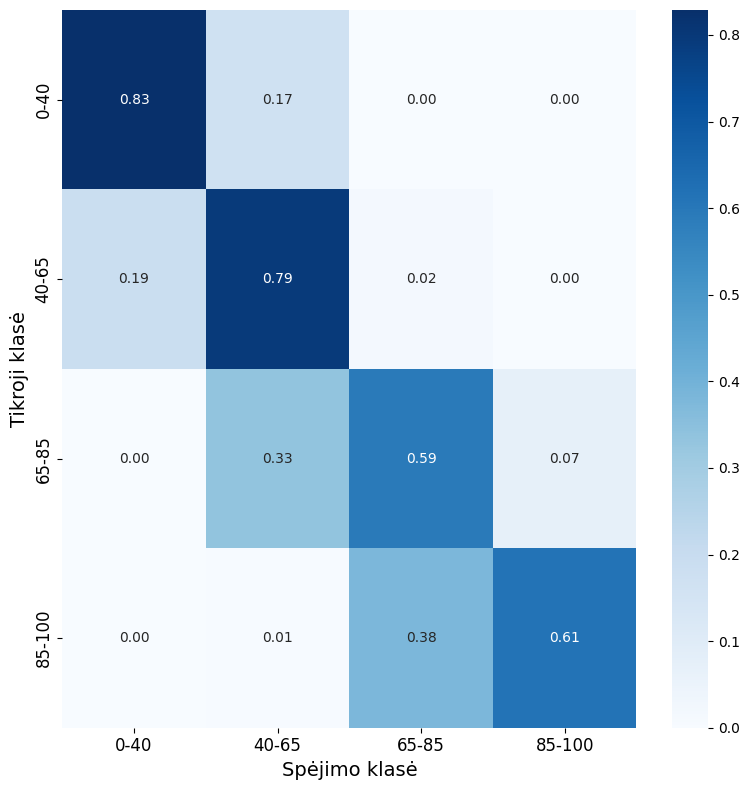

In [31]:
def paper_cm():
    n_samples = [15467, 13952, 2274, 2202]
    matrix_data = [
        [12820, 2647, 0, 0],  # True label: BIS 0–40
        [2622, 11091, 239, 0],  # True label: BIS 40–65
        [0, 761, 1349, 164],  # True label: BIS 65–85
        [0, 13, 836, 1352],  # True label: BIS 85–100
    ]
    labels = ['0-40', '40-65', '65-85', '85-100']

    y_true = []
    y_pred = []

    for true_label, (n, row) in enumerate(zip(n_samples, matrix_data)):
        for pred_label, count in enumerate(row):
            y_true.extend([true_label] * count)
            y_pred.extend([pred_label] * count)
    
    report = classification_report(y_true, y_pred, output_dict=False, digits=3)
    print(report)
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True,  fmt='.2f', cmap = 'Blues',  xticklabels=labels, yticklabels=labels)
    plt.xlabel('Spėjimo klasė', fontsize=14)
    plt.ylabel('Tikroji klasė', fontsize=14)
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=90)
    plt.tight_layout()


paper_cm()